In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
hs_pt = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/one_to_one_events/dfhs_pt.tsv', sep='\t')
hs_carlito = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/one_to_one_events/dfhs_carlito.tsv', sep='\t')
hs_saimiri = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/one_to_one_events/dfhs_saimiri_b.tsv', sep='\t')
hs_lemur = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/one_to_one_events/dfhs_lemur_c.tsv', sep='\t')
hs_pt['gene']=hs_pt['gene'].apply(lambda x: x.split('_')[-2])
hs_pt['subject_species']=9598
hs_pt['total_genes']=(hs_pt['gene'])
hs_pt['total_genes']=int(len(hs_pt['gene']))
hs_carlito['gene']=hs_carlito['gene'].apply(lambda x: x.split('_')[-2])
hs_carlito['subject_species']=1868482
hs_carlito['total_genes']=int(len(hs_carlito['gene']))
hs_saimiri['gene']=hs_saimiri['gene'].apply(lambda x: x.split('_')[-2])
hs_saimiri['subject_species']=39432
hs_saimiri['total_genes']=int(len(hs_saimiri['gene']))
hs_lemur['gene']=hs_lemur['gene'].apply(lambda x: x.split('_')[-2])
hs_lemur['subject_species']=9447
hs_lemur['total_genes']=int(len(hs_lemur['gene']))
df_all = pd.concat([hs_pt, hs_carlito, hs_saimiri, hs_lemur], axis=0)
print(df_all)

          gene  species  number_of_exons  number_of_hits  number_of_events  \
0         A1BG     9606                8               8                 2   
1         A1CF     9606               12              12                 0   
2          A2M     9606               35              36                 5   
3        A2ML1     9606               33              34                 4   
4      A3GALT2     9606                4               4                 0   
...        ...      ...              ...             ...               ...   
15868   ZYG11A     9606               12              12                 3   
15869   ZYG11B     9606               12              12                 1   
15870      ZYX     9606                9               9                 0   
15871    ZZEF1     9606               47              47                 1   
15872     ZZZ3     9606               15              15                 2   

       no_event  fusion  fission  full_duplication  others  sub

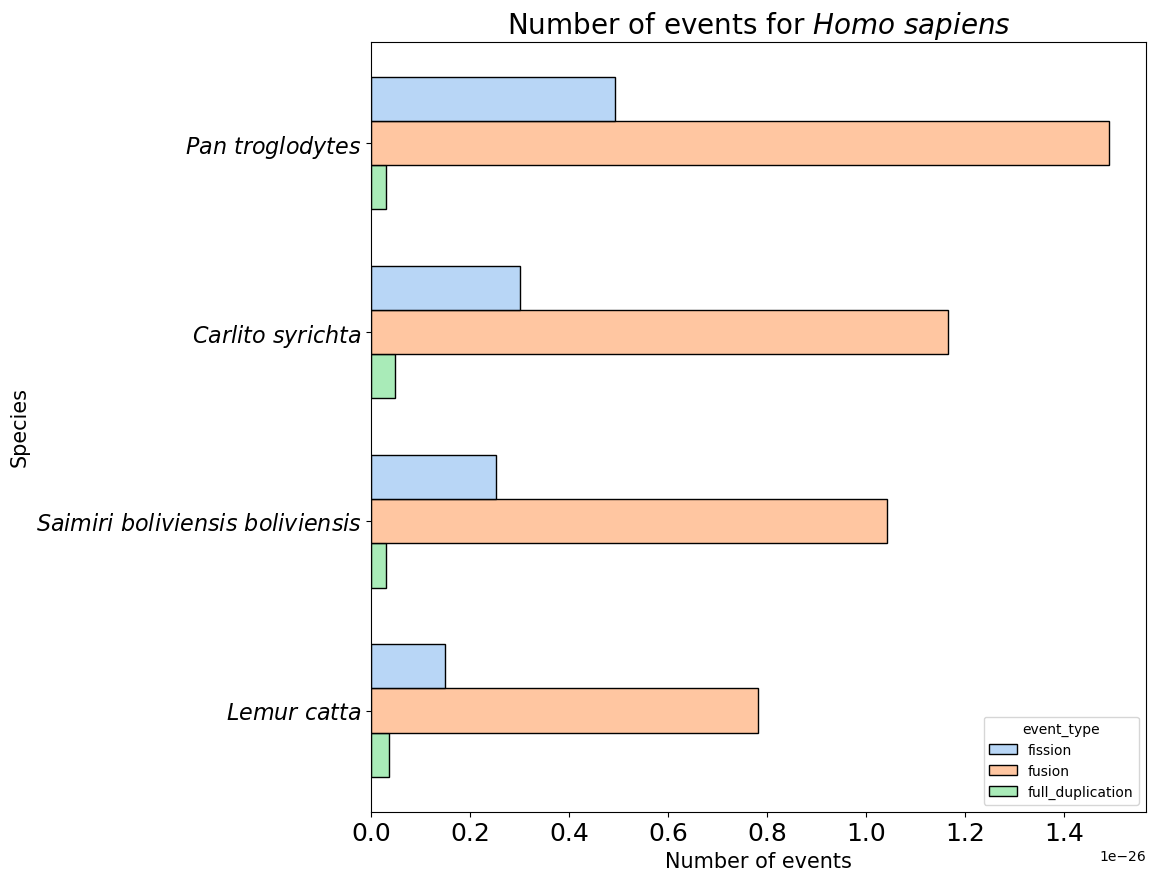

In [23]:
df_table= pd.read_csv('/home/collot/stage/collot/PrimateData/PrimateInfo.csv', sep='\t')
genid_species = dict(zip(df_table['Organism Taxonomic ID'].astype(str), df_table['Organism Name'].astype(str)))  #dictionary containing tuples (genome_id/specie_name)

event_columns = ['fission', 'fusion', 'full_duplication'] 
df_all[event_columns] = df_all[event_columns].fillna(0) 
df_all[event_columns] = df_all[event_columns].div(df_all['total_genes'], axis=0)

df_long = df_all.melt(id_vars=['gene', 'subject_species', 'number_of_exons'], value_vars=event_columns, var_name='event_type', value_name='event_count')
df_long['subject_species'] = df_long['subject_species'].astype(str).map(genid_species)
df_long['subject_species'] = df_long['subject_species'].apply(lambda x: f"$\\it{{{x.replace(' ', '\\ ')}}}$")

species_order = df_long.groupby('subject_species')['event_count'].sum().sort_values(ascending=False).index
df_long['subject_species'] = pd.Categorical(df_long['subject_species'], categories=species_order, ordered=True)

fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=df_long, y="subject_species", hue="event_type", weights="event_count", bins=35, multiple="dodge", palette="pastel",shrink=.7 )
plt.title('Number of events for '+r'$\it{Homo\ sapiens}$', size=20)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.xlabel('Number of events', size=15)
plt.ylabel('Species', size=15)

plt.tight_layout
plt.savefig('/home/collot/stage_git/figures/events_hs_oto.png', bbox_inches='tight')